In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns


df =  pd.read_csv(r"C:\Users\sehri\Desktop\Project Portfolio\Sales data (worked upon).csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,City,State,Month Number,Sales,Hour,Order Date,Date,Day,Month Name,Year
0,297150,Lightning Charging Cable,1,$14.95,427 Wilson St,Dallas,TX,1,14.95,0,1/1/2020,1,Wednesday,January,2020
1,297817,iPhone,1,$700.00,519 13th St,New York City,NY,1,700.00,0,1/1/2020,1,Wednesday,January,2020
2,297969,Google Phone,1,$600.00,542 2nd St,San Francisco,CA,1,600.00,0,1/1/2020,1,Wednesday,January,2020
3,298344,Wired Headphones,1,$11.99,731 7th St,New York City,NY,1,47.96,3,1/1/2020,1,Wednesday,January,2020
4,299049,Apple Airpods Headphones,1,$150.00,762 Johnson St,San Francisco,CA,1,150.00,1,1/1/2020,1,Wednesday,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178431,293993,AAA Batteries (4-pack),1,$2.99,999 10th St,San Francisco,CA,12,2.99,0,12/1/2019,1,Sunday,December,2019
178432,294093,USB-C Charging Cable,1,$11.95,51 Cherry St,New York City,NY,12,11.95,0,12/1/2019,1,Sunday,December,2019
178433,294441,Wired Headphones,1,$11.99,469 Sunset St,San Francisco,CA,12,11.99,0,12/1/2019,1,Sunday,December,2019
178434,294629,Wired Headphones,1,$11.99,668 Ridge St,San Francisco,CA,12,11.99,1,12/1/2019,1,Sunday,December,2019


In [2]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
 Price Each         0
Purchase Address    0
City                0
State               0
Month Number        0
 Sales              0
Hour                0
Order Date          0
Date                0
Day                 0
Month Name          0
Year                0
dtype: int64

In [3]:
df.columns =  df.columns.str.strip()

In [4]:
df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each           object
Purchase Address     object
City                 object
State                object
Month Number          int64
Sales               float64
Hour                  int64
Order Date           object
Date                  int64
Day                  object
Month Name           object
Year                  int64
dtype: object

# Changing Column names

In [5]:
df.rename(columns  = 
          {'Order ID' : 'Order_ID' ,
           'Quantity Ordered' : 'Quantity_Ordered' ,
           'Price Each' : 'Price_Each' ,
           'Purchase Address' : 'Purchase_Address' ,
           'Month Number' : 'Month_Number' , 
           'Order Date' : 'Order_Date',
           'Month Name' : 'Month_Name'} ,
          inplace = True)

# Changing COLUMN dtype

In [6]:
df['Sales'] = df['Sales'].astype(float)


In [7]:
df.dtypes

Order_ID              int64
Product              object
Quantity_Ordered      int64
Price_Each           object
Purchase_Address     object
City                 object
State                object
Month_Number          int64
Sales               float64
Hour                  int64
Order_Date           object
Date                  int64
Day                  object
Month_Name           object
Year                  int64
dtype: object

# Establishing connection with Sqlite3 

In [8]:
conn = sqlite3.connect(":memory:")
df.to_sql("Store_Data", conn, index = False, if_exists = 'replace')



178436

# SQL QUERIES 

## Sales And Revenue Analysis

### 1. Finding Total Sales

In [9]:
 # SQL 

query  =  ''' Select Product, Sum(Sales) as Total_Sales
              FROM Store_Data
              Group by Product
              ORDER BY Total_Sales DESC
              LIMIT 10 ; '''

def format_large_numbers(x):
    if x >= 1_000_000:
        return f'{x/1_000_000:.2f}M'
    elif x >= 1_000:
        return f'{x/1_000 : .2f}K'
    else:
        return x




result =  pd.read_sql(query , conn) 


result



        
        

,Product,Total_Sales
0,Macbook Pro Laptop,7867600.00
1,iPhone,4710300.00
2,ThinkPad Laptop,4037959.62
3,Google Phone,3253800.00
4,27in 4K Gaming Monitor,2385958.82
5,34in Ultrawide Monitor,2307679.27
6,Apple Airpods Headphones,2252400.00
7,Flatscreen TV,1415700.00
8,Bose SoundSport Headphones,1289271.06
9,27in FHD Monitor,1108876.07


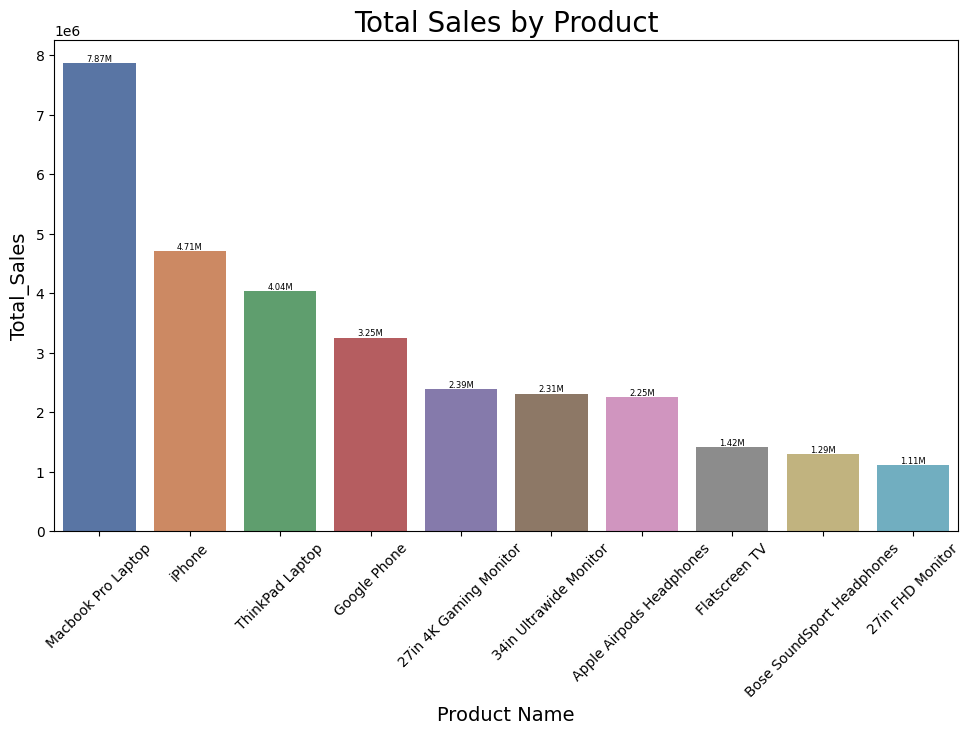

In [10]:
# logic

result['Formatted_Sales'] =  result['Total_Sales'].apply(format_large_numbers)

plt.figure(figsize = (10,6))
barplot  = sns.barplot(x = 'Product' , y = 'Total_Sales', data = result, hue = 'Product',  palette = 'deep')

for i, row, in result.iterrows():
    barplot.text(
        i,
        row['Total_Sales'],
        row['Formatted_Sales'],
        va  = 'bottom',
        ha =  'center' , 
        fontsize  =  6)

# visualization

plt.xlabel('Product Name', fontsize = 14)
plt.ylabel('Total_Sales', fontsize  = 14)
plt.title('Total Sales by Product', fontsize  = 20)
plt.tight_layout()
plt.xticks(rotation =  45)
plt.show()

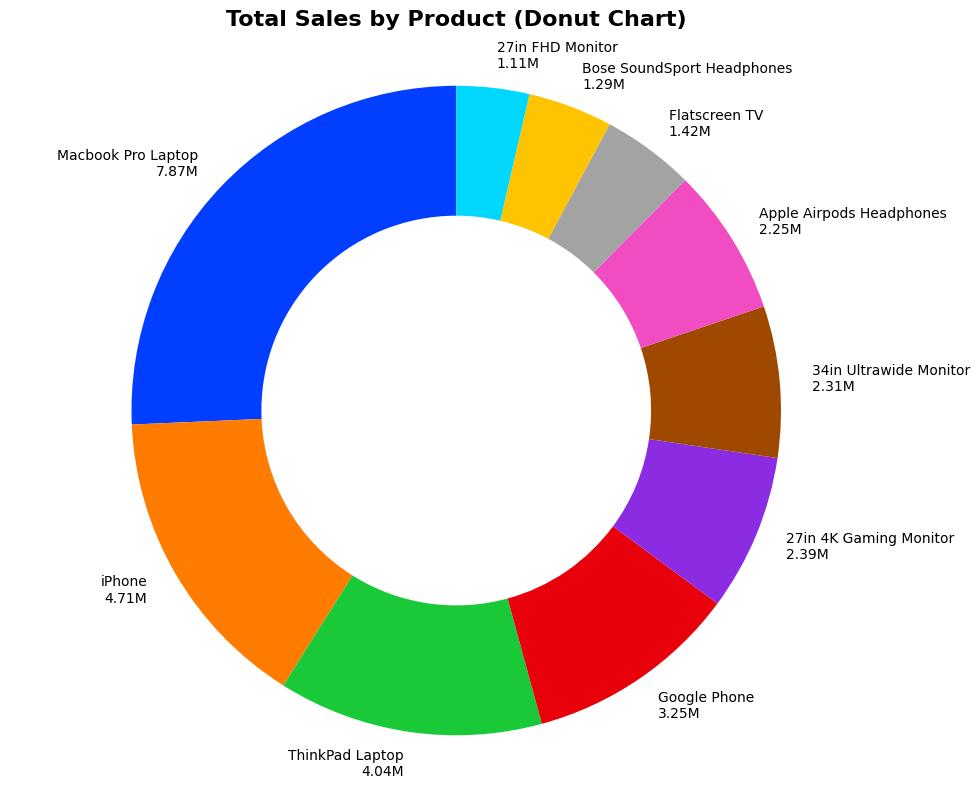

In [11]:
plt.figure(figsize=(10, 8))


plt.pie(
    result['Total_Sales'],
    labels=[f"{prod}\n{sales}" for prod, sales in 
           zip(result['Product'], result['Formatted_Sales'])],
    colors=sns.color_palette('bright'),
    startangle=90,
    wedgeprops={'width': 0.4}
)


plt.axis('equal')


centre_circle = plt.Circle((0,0), 0.2, color='white', fc='white', linewidth=0)
plt.gca().add_artist(centre_circle)


plt.title('Total Sales by Product (Donut Chart)', 
          fontsize=16, pad=20, weight='bold')



plt.tight_layout()
plt.show()

## 2. Best perfomring product by sales

In [12]:
query  =  ''' SELECT Product as Best_Performing_Product, SUM(Sales) as Total_Sale
              FROM Store_Data
              GROUP BY Best_Performing_Product
              ORDER BY Total_Sale DESC
              LIMIT 1; '''

result =  pd.read_sql(query, conn)
result.index = result.index + 1




def Convert_to_million(x):
    if x >= 1:
        return f'{x/1_000_000:.2f}M'
    else:
        return "Can not be converted"

result['Total_Sale'] = result['Total_Sale'].apply(Convert_to_million)

result


,Best_Performing_Product,Total_Sale
1,Macbook Pro Laptop,7.87M


### 3. Monthly Sale Revenue


In [13]:
# SQL

query  =  '''
          SELECT Month_Name, SUM(Sales) as Total_Sales
          FROM Store_Data
          GROUP BY Month_Name
          ORDER BY Total_Sales DESC ; '''

result  =  pd.read_sql(query, conn)
result.index = result.index + 1
result



,Month_Name,Total_Sales
1,December,4505264.98
2,October,3651082.99
3,April,3308277.50
4,November,3120487.12
5,May,3075410.70
6,March,2739938.02
7,July,2584388.35
8,June,2516633.11
9,August,2192824.44
10,February,2146232.20


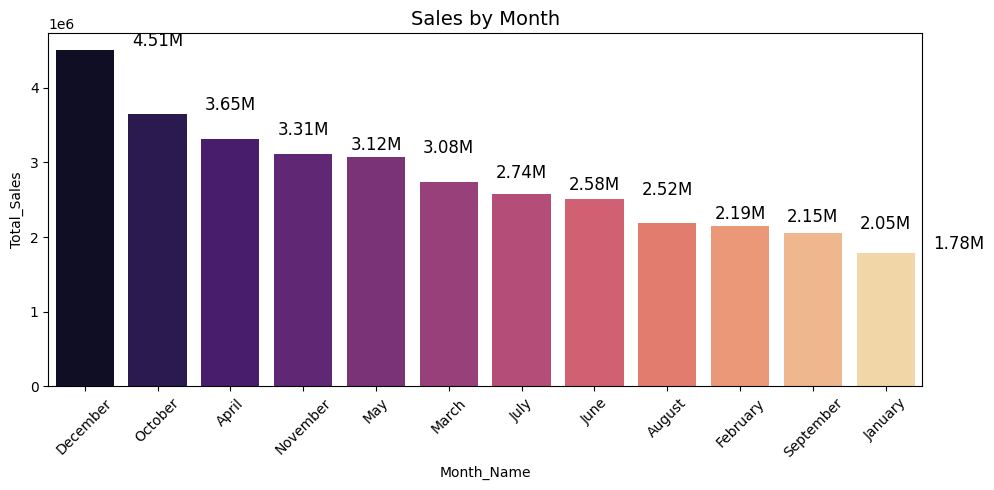

In [14]:
# LOGIC

def format_large_numbers(x):
    if x >= 1_000_000:
          return f'{x/1_000_000:.2f}M'
    elif x >= 1_000:
        return f'{x/1_000:.2f}K'
    else:
        return str(x)

result["Formatted_Sales"] = result["Total_Sales"].apply(format_large_numbers)


#VISUALIZATION

plt.figure(figsize = (10,5))
barplot = sns.barplot(x  = 'Month_Name' , y = 'Total_Sales', data =  result , hue = 'Month_Name' , palette =  'magma')

for i, row in result.iterrows():
    barplot.text(
        i,
        row['Total_Sales'],
        row['Formatted_Sales'],
        ha = 'center',
        va =  'bottom',
        fontsize  = 12)


    
plt.title('Sales by Month', fontsize = 14)
plt.xlabel('Month_Name', fontsize = 10)
plt.ylabel('Total_Sales' , fontsize = 10)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()
    
    



## 4. Percentage of total sales comes from the top 5 products

In [15]:
# SQL

query = ''' 
SELECT 
    Product,
    SUM(Sales) as Product_Sale,
    (SUM(Sales)/(SELECT SUM(Sales) FROM Store_Data)) * 100 as Percentage_Sales
FROM Store_Data
GROUP BY Product
ORDER BY Percentage_Sales DESC
LIMIT 15 ; 
'''


result = pd.read_sql(query, conn)
result.index = result.index + 1
result







,Product,Product_Sale,Percentage_Sales
1,Macbook Pro Laptop,7867600.00,23.365696
2,iPhone,4710300.00,13.988947
3,ThinkPad Laptop,4037959.62,11.992188
4,Google Phone,3253800.00,9.663341
5,27in 4K Gaming Monitor,2385958.82,7.085971
6,34in Ultrawide Monitor,2307679.27,6.853492
7,Apple Airpods Headphones,2252400.00,6.689320
8,Flatscreen TV,1415700.00,4.204435
9,Bose SoundSport Headphones,1289271.06,3.828959
10,27in FHD Monitor,1108876.07,3.293210


In [16]:
# Functions
def convert_to_percentage(x):
    return f'{x:.2f}%'

def format_numbers(x):
    return f'{x:,.2f}'

In [17]:
# LOGIC
result = pd.read_sql(query, conn)
result['Product_Sale_Formatted'] = result['Product_Sale'].apply(format_large_numbers)
result['Percentage_Sales_Formatted'] = result['Percentage_Sales'].apply(convert_to_percentage)
# result  =  result[['Product', 'Product_Sale_Formatted', 'Percentage_Sales_Formatted']]
result.index = result.index + 1
result

,Product,Product_Sale,Percentage_Sales,Product_Sale_Formatted,Percentage_Sales_Formatted
1,Macbook Pro Laptop,7867600.00,23.365696,7.87M,23.37%
2,iPhone,4710300.00,13.988947,4.71M,13.99%
3,ThinkPad Laptop,4037959.62,11.992188,4.04M,11.99%
4,Google Phone,3253800.00,9.663341,3.25M,9.66%
5,27in 4K Gaming Monitor,2385958.82,7.085971,2.39M,7.09%
6,34in Ultrawide Monitor,2307679.27,6.853492,2.31M,6.85%
7,Apple Airpods Headphones,2252400.00,6.689320,2.25M,6.69%
8,Flatscreen TV,1415700.00,4.204435,1.42M,4.20%
9,Bose SoundSport Headphones,1289271.06,3.828959,1.29M,3.83%
10,27in FHD Monitor,1108876.07,3.293210,1.11M,3.29%


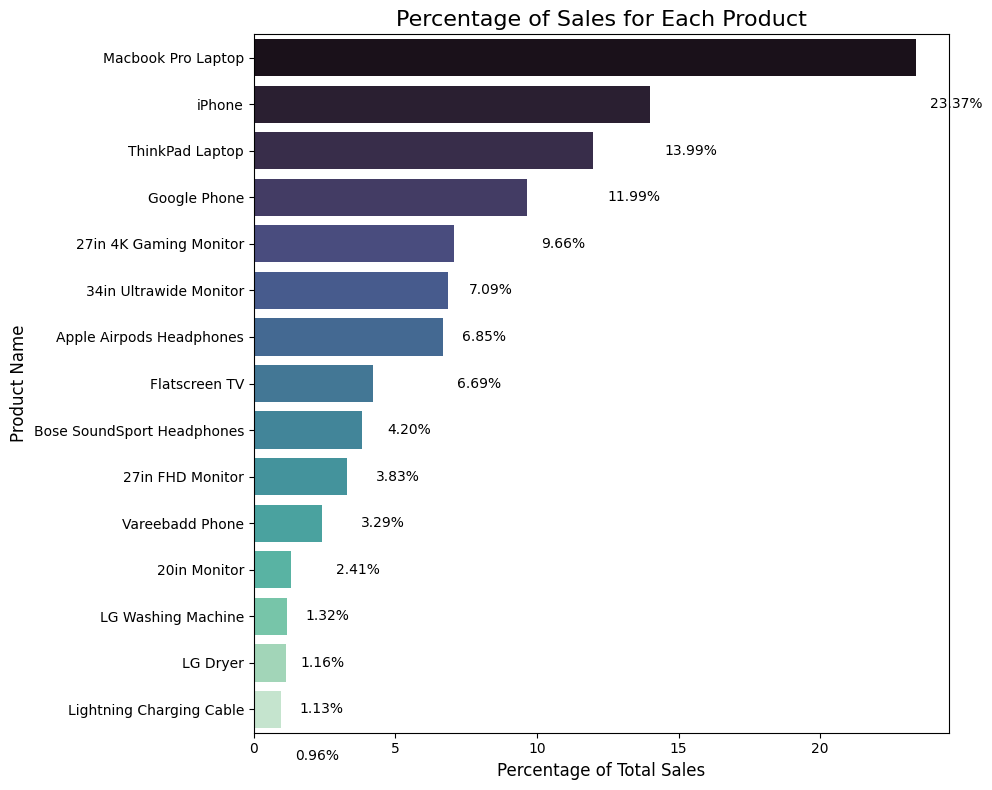

In [18]:
# VISUALIZATION

plt.figure(figsize=(10, 8))
barplot = sns.barplot(
    x='Percentage_Sales', 
    y='Product',          
    data=result,
    palette='mako',
    orient='h',
    hue='Product',       
    legend=False         
)

# Adding Labels
for index, row in result.iterrows():
    barplot.text(
        row['Percentage_Sales'] + 0.5, 
        index,                          
        row['Percentage_Sales_Formatted'],
        va='center',
        ha='left',
        fontsize=10
    )

    plt.xlabel('Percentage of Total Sales', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.title("Percentage of Sales for Each Product", fontsize=16)
plt.tight_layout()


if len(result) > 15:
    plt.ylim(14.5, -0.5)  

plt.show()
    

## 5. Top 5 Cities by Total Sales

In [19]:
query  =  ''' SELECT City, SUM(Sales) as Total_Sales
              FROM Store_Data
              GROUP BY City
              ORDER BY Total_Sales DESC 
              LIMIT 5
              ; '''

result = pd.read_sql(query, conn)
result['Total_Sales'] = result['Total_Sales'].apply(format_large_numbers)
result.index = result.index  + 1 



result

,City,Total_Sales
1,San Francisco,8.06M
2,Los Angeles,5.31M
3,New York City,4.57M
4,Boston,3.58M
5,Atlanta,2.72M


## 6. Most Active Purchase Hours

In [20]:
query  = ''' SELECT Hour, COUNT(Quantity_Ordered) AS Orders
             FROM Store_Data
             GROUP BY Hour
             ORDER BY Orders DESC ; ''' 

result  =  pd.read_sql(query, conn)
result.index = result.index + 1

result.head(3)
             

,Hour,Orders
1,19,12377
2,12,12082
3,11,11882


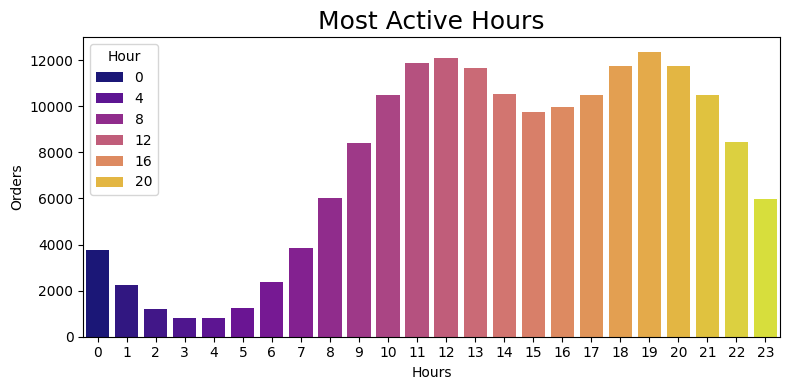

In [21]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'Hour', y = 'Orders', data = result, hue = 'Hour' ,  palette = 'plasma')
plt.title('Most Active Hours', fontsize = 18)
plt.xlabel('Hours', fontsize =  10)
plt.ylabel('Orders', fontsize = 10)
# plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## 7. Average Order Value per Month

In [22]:
query =  ''' SELECT Month_Name AS Month, SUM(Sales) AS Total_Sales
             FROM Store_Data
             GROUP BY Month
             ORDER BY Total_Sales DESC ; '''

result =  pd.read_sql(query, conn)
result.index = result.index + 1
result['Formatted_Sales'] = result['Total_Sales'].apply(format_large_numbers)

result

,Month,Total_Sales,Formatted_Sales
1,December,4505264.98,4.51M
2,October,3651082.99,3.65M
3,April,3308277.50,3.31M
4,November,3120487.12,3.12M
5,May,3075410.70,3.08M
6,March,2739938.02,2.74M
7,July,2584388.35,2.58M
8,June,2516633.11,2.52M
9,August,2192824.44,2.19M
10,February,2146232.20,2.15M


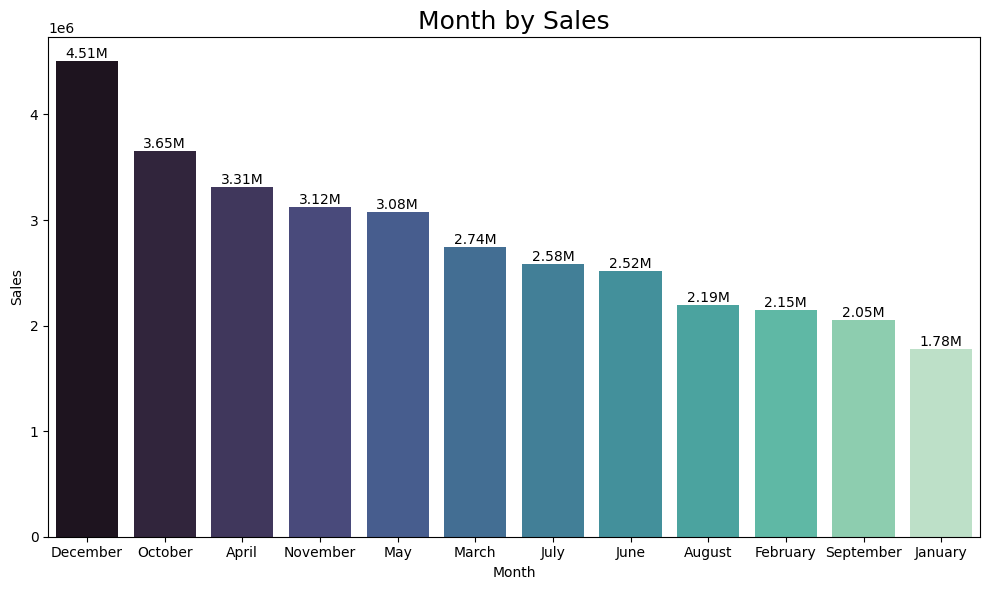

In [23]:
plt.figure(figsize = (10, 6))
barplot = sns.barplot(x =  'Month', y = 'Total_Sales', data = result , hue = 'Month',  palette = 'mako')

# for i, row in result.iterrows():
#     barplot.text(
#         i,
#         row['Total_Sales'] - 2 ,
#         row['Formatted_Sales'],
#         ha = 'center',
#         va = 'bottom', 
#         fontsize = 10)

for patch, label in zip(barplot.patches, result['Formatted_Sales']):
    barplot.text(
        patch.get_x() + patch.get_width() / 2,
        patch.get_height(),
        label,
        ha='center',
        va='bottom',
        fontsize=10)


    
plt.title('Month by Sales', fontsize = 18)
plt.xlabel('Month', fontsize = 10)
plt.ylabel("Sales", fontsize = 10)
plt.tight_layout()
plt.show()

## 8. State-wise Total Sales

In [24]:
query  =  ''' SELECT State, SUM(Sales) as Total_Sales
              FROM Store_Data
              GROUP BY State
              ORDER BY Total_Sales
              ; '''

result = pd.read_sql(query , conn)
result.index = result.index + 1


def format_large_numbers(x):
    if x >= 1_000_000:
        return f'{x/1_000_000:.2f}M'
    elif x >= 1_000:
        return f'{x/1_000:.2f}K'
    else:
        return x

result['Formatted_Sales'] = result['Total_Sales'].apply(format_large_numbers)
result

,State,Total_Sales,Formatted_Sales
1,ME,442812.58,442.81K
2,OR,1824271.46,1.82M
3,WA,2682930.41,2.68M
4,GA,2721689.32,2.72M
5,MA,3576739.78,3.58M
6,TX,4490082.43,4.49M
7,NY,4567165.01,4.57M
8,CA,13365893.53,13.37M


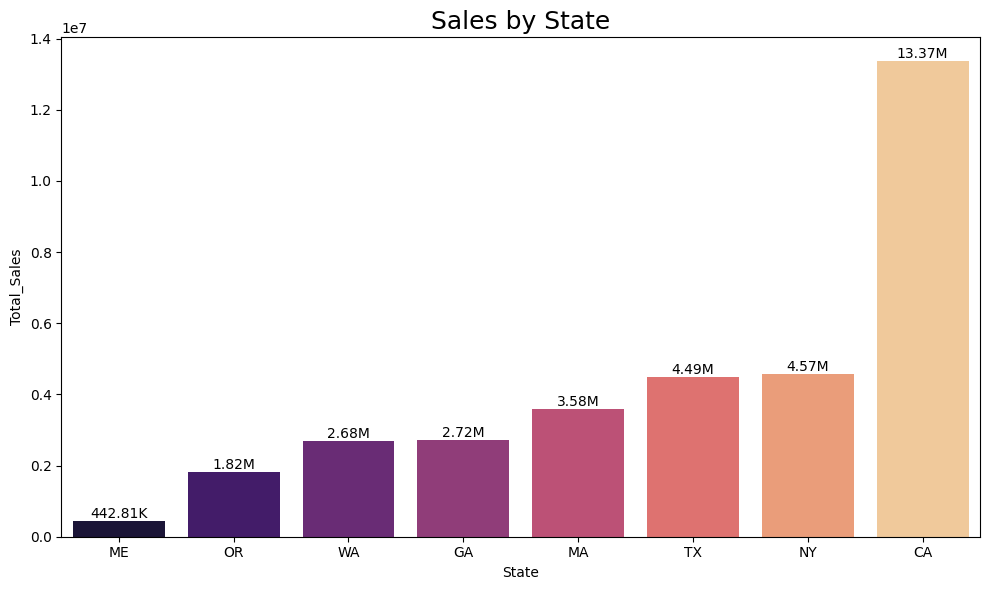

In [25]:
plt.figure(figsize = (10,6))
barplot = sns.barplot(x = 'State', y = 'Total_Sales', data = result, hue = 'State' , palette = 'magma')

for patch, label in zip(barplot.patches, result['Formatted_Sales']):
    barplot.text(
        patch.get_x() + patch.get_width() / 2,
        patch.get_height(),
        label,
        va = 'bottom',
        ha = 'center',
        fontsize  =  10)

plt.title('Sales by State', fontsize  = 18)
plt.xlabel('State', fontsize   = 10)
plt.ylabel('Total_Sales', fontsize  =  10)
plt.tight_layout()
plt.show()

## 8. Products sold in each city

In [26]:
query = ''' SELECT City, Product, SUM(Quantity_Ordered) AS Total_Quantity
FROM Store_Data
GROUP BY City, Product
ORDER BY City, Total_Quantity DESC;
'''

result = pd.read_sql(query , conn)
result.index = result.index  + 1

result

,City,Product,Total_Quantity
1,Atlanta,Lightning Charging Cable,1636
2,Atlanta,AA Batteries (4-pack),1630
3,Atlanta,USB-C Charging Cable,1623
4,Atlanta,AAA Batteries (4-pack),1575
5,Atlanta,Wired Headphones,1328
...,...,...,...
167,Seattle,ThinkPad Laptop,324
168,Seattle,20in Monitor,317
169,Seattle,Vareebadd Phone,177
170,Seattle,LG Washing Machine,56


## 9. Most popular products per state

In [27]:
query = ''' 
SELECT State, Product, COUNT(Quantity_Ordered) AS Times_Ordered
FROM Store_Data
GROUP BY State, Product
ORDER BY State, Times_Ordered DESC;
'''

result = pd.read_sql(query, conn)
result.index = result.index + 1
result



,State,Product,Times_Ordered
1,CA,USB-C Charging Cable,8161
2,CA,Lightning Charging Cable,8130
3,CA,AAA Batteries (4-pack),8092
4,CA,AA Batteries (4-pack),8044
5,CA,Wired Headphones,7125
...,...,...,...
148,WA,ThinkPad Laptop,324
149,WA,20in Monitor,317
150,WA,Vareebadd Phone,177
151,WA,LG Washing Machine,56


## 10. Rank Products by Sales per Month

In [28]:
query = '''
    SELECT 
        Product,
        Month_Name,
        SUM(Sales) AS Total_Sales,
        RANK() OVER (PARTITION BY Month_Name ORDER BY SUM(Sales) DESC) AS Product_Rank
    FROM Store_Data
    GROUP BY Month_Name, Product
    ORDER BY Month_Name, Product_Rank;
'''


result = pd.read_sql(query, conn)
result.index = result.index + 1


month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']


result['Month_Name'] = pd.Categorical(result['Month_Name'], categories=month_order, ordered=True)
result = result.sort_values(['Month_Name', 'Product_Rank'])

result


,Product,Month_Name,Total_Sales,Product_Rank
77,Macbook Pro Laptop,January,394400.00,1
78,iPhone,January,260400.00,2
79,ThinkPad Laptop,January,213997.86,3
80,Google Phone,January,187200.00,4
81,27in 4K Gaming Monitor,January,119336.94,5
...,...,...,...,...
53,Lightning Charging Cable,December,43534.40,15
54,USB-C Charging Cable,December,36148.75,16
55,Wired Headphones,December,30478.58,17
56,AA Batteries (4-pack),December,14031.36,18


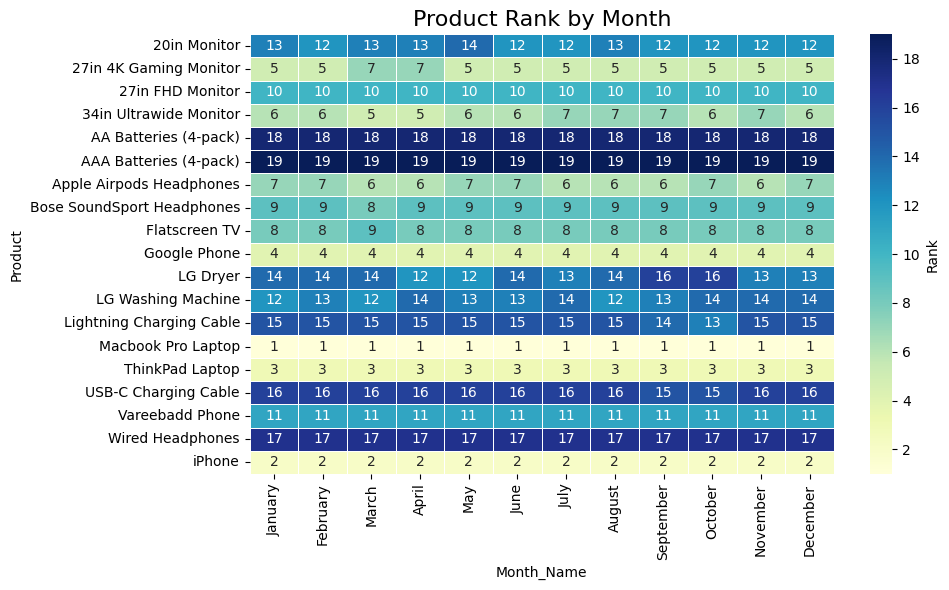

In [29]:
# VISUALIZATION
heatmap_data = result.pivot(index='Product', columns='Month_Name', values='Product_Rank')

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap='YlGnBu',
    cbar_kws={'label': 'Rank'},
    linewidths=0.5
)

plt.title('Product Rank by Month', fontsize=16)
plt.xlabel('Month_Name')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


## 11. Running Total Sales by Month

In [30]:
query  = ''' SELECT Month_Name,
                    SUM(Sales) as Total_Sales,
                    SUM(SUM(Sales)) OVER (ORDER BY Month_Number) AS Running_Monthly_Sales
                    FROM Store_Data
                    GROUP BY Month_Name
                    ORDER BY Month_Name; '''

result = pd.read_sql(query , conn)
result.index = result.index+1

monthly_order = ['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November', 'December']

result['Month_Name'] = pd.Categorical(result['Month_Name'], categories = monthly_order, ordered = True)
result = result.sort_values(['Month_Name', 'Running_Monthly_Sales'])

result['Formatted_Total_Sales'] = result['Total_Sales'].apply(format_large_numbers)
result['Formatted_Running_Sum'] = result['Running_Monthly_Sales'].apply(format_large_numbers)
result
                

                    

,Month_Name,Total_Sales,Running_Monthly_Sales,Formatted_Total_Sales,Formatted_Running_Sum
5,January,1782199.95,1782199.95,1.78M,1.78M
4,February,2146232.20,3928432.15,2.15M,3.93M
8,March,2739938.02,6668370.17,2.74M,6.67M
1,April,3308277.50,9976647.67,3.31M,9.98M
9,May,3075410.70,13052058.37,3.08M,13.05M
7,June,2516633.11,15568691.48,2.52M,15.57M
6,July,2584388.35,18153079.83,2.58M,18.15M
2,August,2192824.44,20345904.27,2.19M,20.35M
12,September,2048845.16,22394749.43,2.05M,22.39M
11,October,3651082.99,26045832.42,3.65M,26.05M


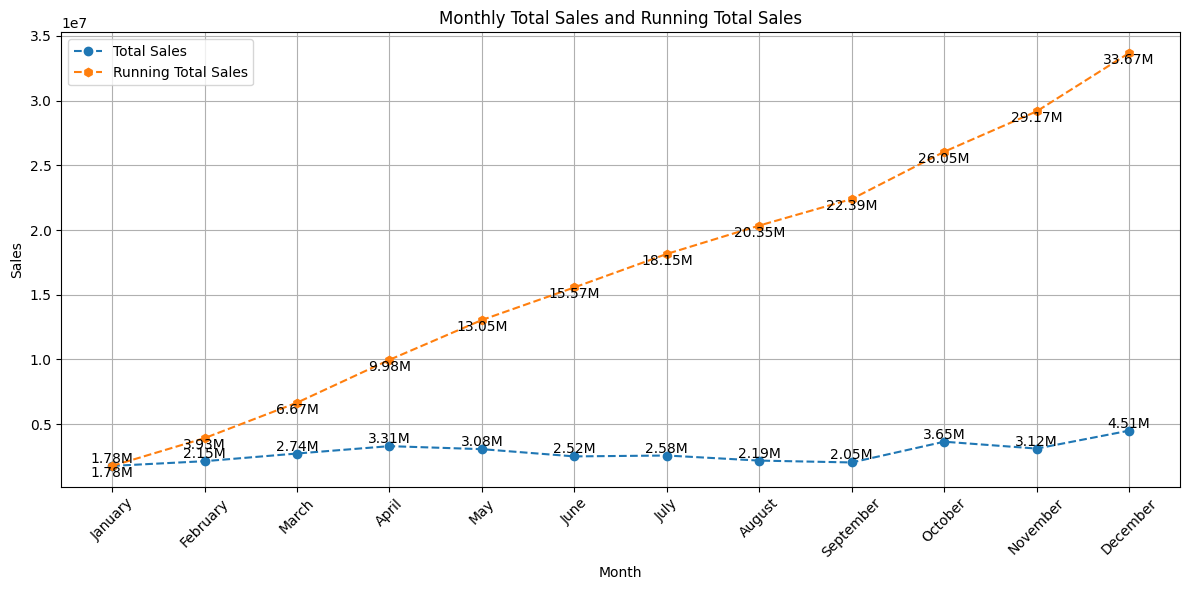

In [31]:

# VISUALIZATION

result = result.sort_values('Month_Name')


plt.figure(figsize=(12, 6))
plt.plot(result['Month_Name'], result['Total_Sales'], marker='o', label='Total Sales', linestyle='--')
plt.plot(result['Month_Name'], result['Running_Monthly_Sales'], marker='h', label='Running Total Sales', linestyle='--')

for i, value in enumerate(result['Total_Sales']):
    plt.text(i, value, result['Formatted_Total_Sales'].iloc[i], va = 'bottom', ha = 'center', fontsize = 10, color = 'black')

for i, value in enumerate(result['Running_Monthly_Sales']):
    plt.text(i, value, result['Formatted_Running_Sum'].iloc[i] , va ='top', ha = 'center', fontsize = 10, color = 'black')


plt.title('Monthly Total Sales and Running Total Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


## 12.  Top-Selling Product Per City

In [32]:
query  =  ''' SELECT * 
              FROM (SELECT 
                     City,
                     Product as Top_Selling_Product,
                     SUM(Sales) as Total_Sales, 
                     Rank() OVER (Partition by City ORDER BY SUM(Sales) DESC) AS Rank_in_City
                     FROM Store_Data
                     GROUP BY City, Product) AS Sub_Query
                WHERE Rank_in_City =  1 ;'''

result = pd.read_sql(query , conn)
# result = result[['City', 'Top_Selling_Product', 'Total_Sales']]
result['Formatted_Total_Sales'] = result['Total_Sales'].apply(format_large_numbers)
result

,City,Top_Selling_Product,Total_Sales,Rank_in_City,Formatted_Total_Sales
0,Atlanta,Macbook Pro Laptop,620500.0,1,620.50K
1,Austin,Macbook Pro Laptop,423300.0,1,423.30K
2,Boston,Macbook Pro Laptop,799000.0,1,799.00K
3,Dallas,Macbook Pro Laptop,640900.0,1,640.90K
4,Los Angeles,Macbook Pro Laptop,1241000.0,1,1.24M
5,New York City,Macbook Pro Laptop,1099900.0,1,1.10M
6,Portland,Macbook Pro Laptop,566100.0,1,566.10K
7,San Francisco,Macbook Pro Laptop,1883600.0,1,1.88M
8,Seattle,Macbook Pro Laptop,593300.0,1,593.30K


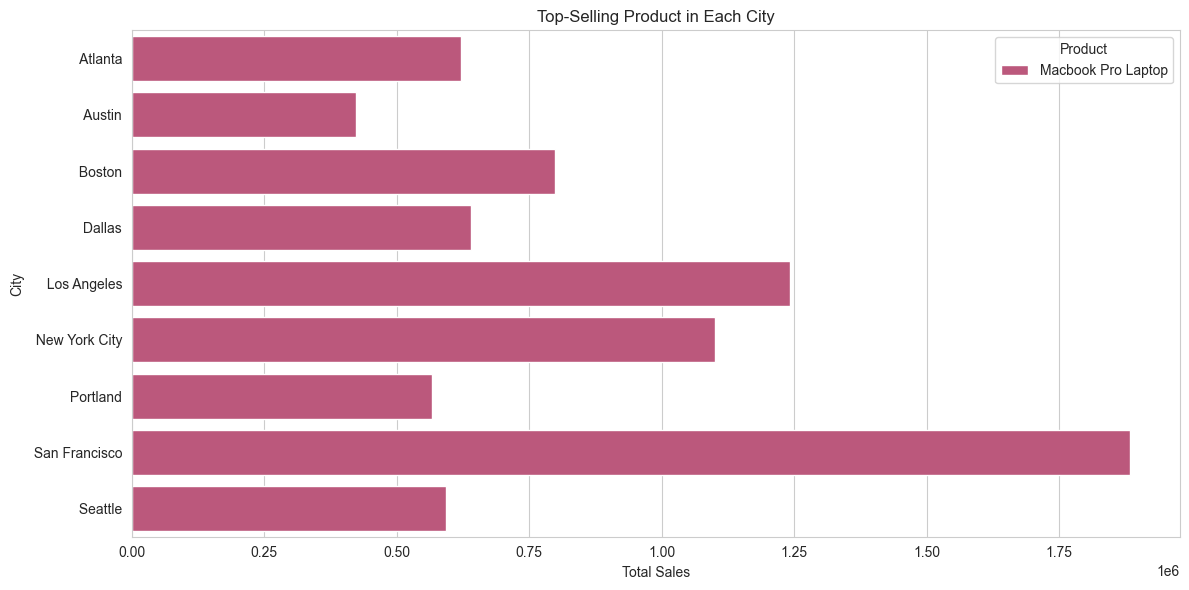

In [33]:
# VISUALIZAITION

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")


barplot = sns.barplot(
    data=result,
    y='City',
    x='Total_Sales',
    hue='Top_Selling_Product',
    palette = 'plasma',
    dodge=False
)

# for patch, label in zip(barplot.patches , result['Formatted_Total_Sales']):
#         barplot.text(
#             patch.get_x() + patch.get_width() / 2 ,
#             patch.get_height(),
#             label,
#             va = 'top',
#             ha = 'right')

    
            


plt.title('Top-Selling Product in Each City')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.legend(title='Product')
plt.tight_layout()
plt.show()


## 13. Orders with Above-Average Sales (per Month)

In [69]:
query = ''' WITH OrderSales AS (
                            SELECT Month_Name,
                                   Order_ID,
                                   SUM(Sales) as Total_Sales
                                   FROM Store_Data
                                   GROUP BY Order_ID, Month_Name
                                   
                                   ),

            AvgSales as (
                            SELECT AVG(Total_Sales) as Sales_Average FROM OrderSales )

            SELECT Month_Name,
                   Order_ID,
                   Total_Sales,
                   (SELECT Sales_Average FROM AvgSales) as Average_Sale,
                   (Total_Sales - (SELECT Sales_Average FROM AvgSales)) as Current_Sale_minus_Average_Sale
                   FROM OrderSales
                   WHERE Total_Sales > (SELECT Sales_Average FROM AvgSales)
                   ORDER BY Total_Sales DESC 
                   LIMIT 20 ;'''




result = pd.read_sql(query , conn)
result.index = result.index + 1
result
                   

,Month_Name,Order_ID,Total_Sales,Average_Sale,Current_Sale_minus_Average_Sale
1,April,181069,3400.00,188.703986,3211.296014
2,April,181544,3400.00,188.703986,3211.296014
3,May,200528,3400.00,188.703986,3211.296014
4,June,210292,3400.00,188.703986,3211.296014
5,January,149611,1999.98,188.703986,1811.276014
6,October,278637,1999.98,188.703986,1811.276014
7,January,141245,1700.00,188.703986,1511.296014
8,January,141288,1700.00,188.703986,1511.296014
9,January,141314,1700.00,188.703986,1511.296014
10,January,141360,1700.00,188.703986,1511.296014


## 14. Detect Sales Spikes (Sales Greater Than Previous Day)



In [73]:
df.dtypes


Order_ID              int64
Product              object
Quantity_Ordered      int64
Price_Each           object
Purchase_Address     object
City                 object
State                object
Month_Number          int64
Sales               float64
Hour                  int64
Order_Date           object
Date                  int64
Day                  object
Month_Name           object
Year                  int64
dtype: object

In [88]:
query = ''' SELECT *, (Daily_Sales -  Prev_Day_Sales) as DIFF
            FROM (SELECT 
                    Order_Date,
                    SUM(Sales) as Daily_Sales,
                    LAG(SUM(Sales)) OVER (Order by Order_Date) AS Prev_Day_Sales
                    FROM Store_Data
                    GROUP BY Order_Date)
                    AS Sales_Table
                    WHERE Daily_Sales > Prev_Day_Sales
                    ORDER BY Order_Date ; '''

result = pd.read_sql(query , conn)
result.index = result.index + 1
result

,Order_Date,Daily_Sales,Prev_Day_Sales,DIFF
1,1/10/2019,54988.77,8460.49,46528.28
2,1/11/2019,76851.34,54988.77,21862.57
3,1/13/2019,59450.58,45922.22,13528.36
4,1/15/2019,63651.63,48579.51,15072.12
5,1/17/2019,54890.38,50878.11,4012.27
...,...,...,...,...
174,9/29/2019,71360.99,68865.93,2495.06
175,9/30/2019,70843.83,61417.15,9426.68
176,9/4/2019,70865.62,70843.83,21.79
177,9/6/2019,70039.30,64182.83,5856.47


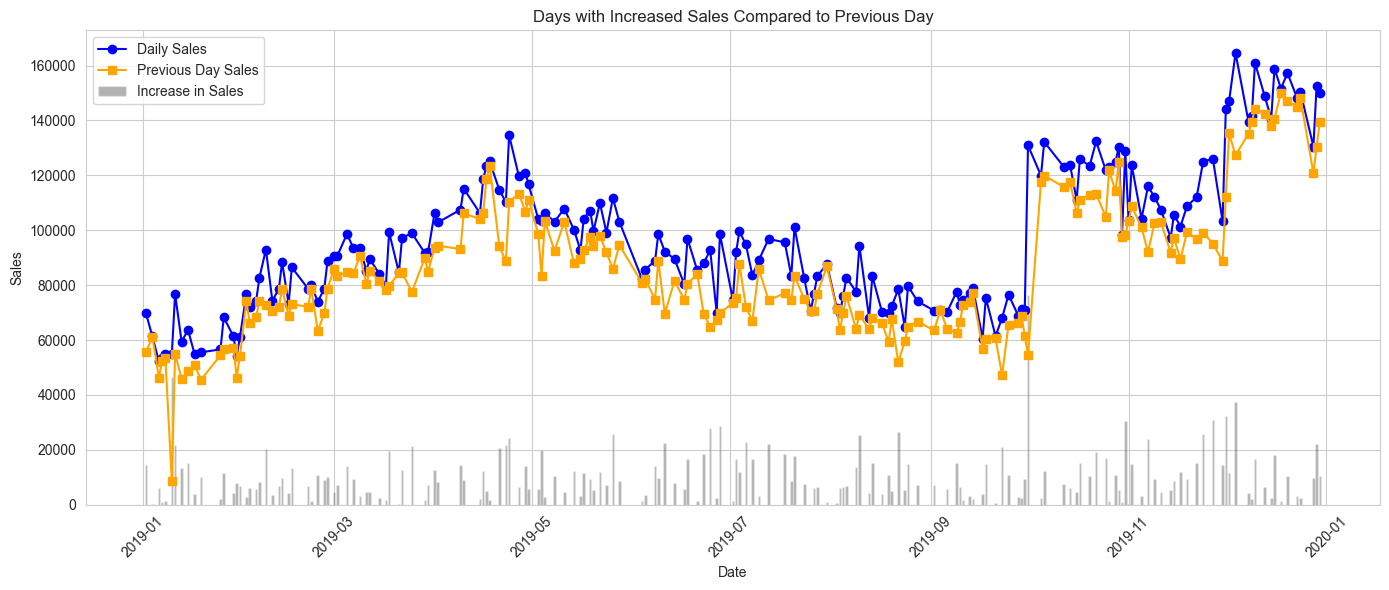

In [93]:
import matplotlib.pyplot as plt


result['Order_Date'] = pd.to_datetime(result['Order_Date'])
result = result.sort_values('Order_Date')
plt.figure(figsize=(14, 6))


plt.plot(result['Order_Date'], result['Daily_Sales'], marker='o', label='Daily Sales', color='blue')
plt.plot(result['Order_Date'], result['Prev_Day_Sales'], marker='s', label='Previous Day Sales', color='orange')


plt.bar(result['Order_Date'], result['DIFF'], label='Increase in Sales', alpha=0.3, color='black')

plt.title('Days with Increased Sales Compared to Previous Day')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
